In [21]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()
#  


In [3]:
len(x_train)
#60000 images

60000

In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train=x_train/255
x_test=x_test/255
#    

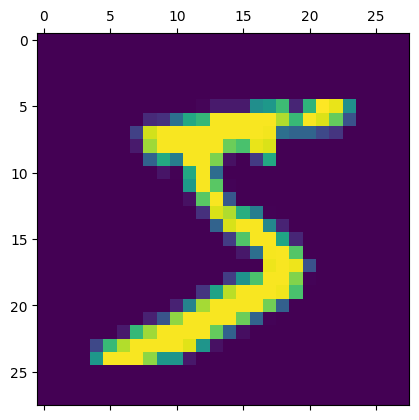

In [9]:
plt.matshow(x_train[0])

In [10]:
y_train[0]

5

In [11]:
x_train_flattened=x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test_flattened=x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [12]:
x_train_flattened.shape


(60000, 784)

In [13]:
x_test_flattened.shape

(10000, 784)

In [14]:
#  
#  
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
    # 
])
model.compile(
    #  
    # 
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    # 
    metrics=['accuracy']
)

#fit is where the training is happening,epochs is the number of iterations for which the nn is going to run the training
model.fit(x_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4622 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3031 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2666 - accuracy: 0.9249


In [15]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.2670 - accuracy: 0.9260


[0.2670160233974457, 0.9259999990463257]

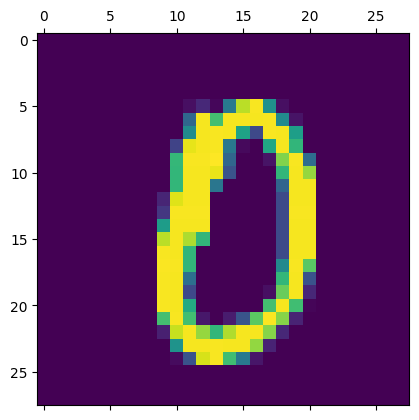

In [16]:
plt.matshow(x_test[55])

In [17]:
y_predict=model.predict(x_test_flattened)

313/313 [==============================] - 1s 3ms/step


In [18]:
np.argmax(y_predict[55])

0

In [19]:
#ADDING A HIDDEN LAYER TO IMPROVE THE ACCURACY
model=keras.Sequential([
    
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
     keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    # 
    
])
model.compile(
      optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2463 - accuracy: 0.9277
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1011 - accuracy: 0.9692
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0706 - accuracy: 0.9783
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0546 - accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0439 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0363 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0286 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0263 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0226 - accuracy: 0.9921
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [20]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1050 - accuracy: 0.9744


[0.10498249530792236, 0.974399983882904]